# Netflix data Analysis

Objectives:

Q1:What is the most frequent genre in the dataset? 

Q2: What genres has highest votes ? 

Q3: What movie got the highest popularity? what's its genre ? 

Q4: What movie got the lowest popularity? what's its genre ? 

Q5: Which year has the most filmmed movies? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('mymoviedb.csv' , lineterminator = '\n')

* Exploration Summary

> we have a dataframe consisting of 9827 rows and 9 columns
> our dataset looks a bit tidy with no Null or duplicate values
> Release_date column needs to be casted into date time and to extract only the year value
> Overview, Orignal_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them
> there is noticable outliers in the popularity column
> Vote_Average better be categorised for proper analysis
> Genre column has comma seperated values and white spaces that needs to be handled and casted into category

In [60]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [62]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [63]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

In [64]:
# Basic data for statistical analysis
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [65]:
df. head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [66]:
# Convert Resealse data from object to datetime datatype
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [67]:
# Eliminate date and month, since only year of release is required
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [68]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [70]:
# Dropping unnecessary columns
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis = 1, inplace = True)

In [71]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [72]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [78]:
# Function for categorizing Vote_Average into 4 bins --> popular, average, below_avg, not_popular
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [79]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [80]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [82]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [90]:
# Check for null values
df['Vote_Average'].isna().sum()

np.int64(100)

In [91]:
# Drop null values
df.dropna(inplace = True)

In [93]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [95]:
# Splitting Genre into a list and then exploding it such that only one genre is present in each row
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [101]:
df['Genre'].dtypes

dtype('O')

In [102]:
# Converting genre list into categorical datatype
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [105]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [107]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix?

In [108]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

In [130]:
# Getting counts in percentage of each genre category
df['Genre'].value_counts('Drama')

Genre
Drama              0.145390
Comedy             0.117642
Action             0.103788
Thriller           0.096783
Adventure          0.071580
Romance            0.057178
Horror             0.057021
Animation          0.055808
Family             0.054986
Fantasy            0.050681
Science Fiction    0.049116
Crime              0.048333
Mystery            0.029939
History            0.016672
War                0.012015
Music              0.011389
TV Movie           0.008375
Documentary        0.007945
Western            0.005362
Name: proportion, dtype: float64

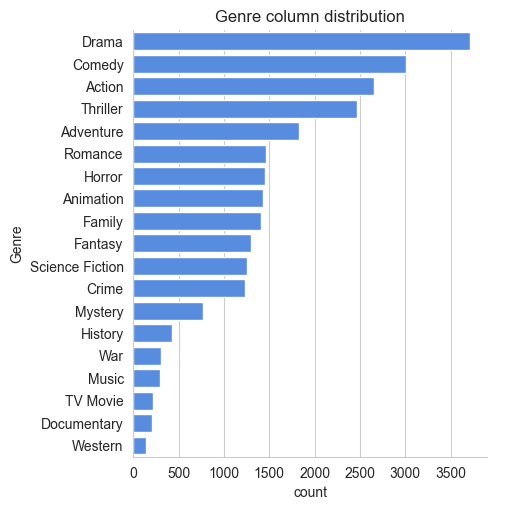

In [109]:
# Catplot of all categories in genre
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order = df[Genre'].value_counts().index,
            color = '#4287f5')

# Plot
plt.title('Genre column distribution')
plt.show()

# Which has highest votes in vote avg column?

In [110]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [132]:
# Percentage of unique counts
df['Vote_Average'].value_counts('average')

Vote_Average
average        0.258806
popular        0.255166
below_avg      0.248435
not_popular    0.237594
Name: proportion, dtype: float64

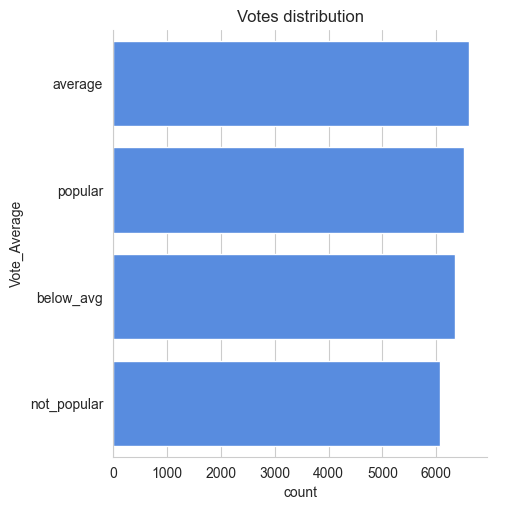

In [113]:
# Catplot of Vote_Average
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')

# Plot
plt.title('Votes distribution')
plt.show()

In [138]:
# Filter only the 'popular' Vote_Average rows
popular_df = df[df['Vote_Average'] == 'popular']

# Group by Genre and count
genre_counts = popular_df['Genre'].value_counts()

# Calculate percentage
genre_percentages = (genre_counts / genre_counts.sum()) * 100

print(genre_percentages.round(2).astype(str) + '%')

Genre
Drama              20.06%
Comedy              9.23%
Animation           8.34%
Action              8.08%
Adventure           6.89%
Romance             6.35%
Thriller            6.04%
Fantasy             5.81%
Family              5.46%
Crime               5.02%
Science Fiction     4.06%
Mystery             3.02%
History             2.65%
War                 2.01%
Horror              1.98%
Music               1.81%
Documentary         1.61%
TV Movie            0.83%
Western             0.74%
Name: count, dtype: object


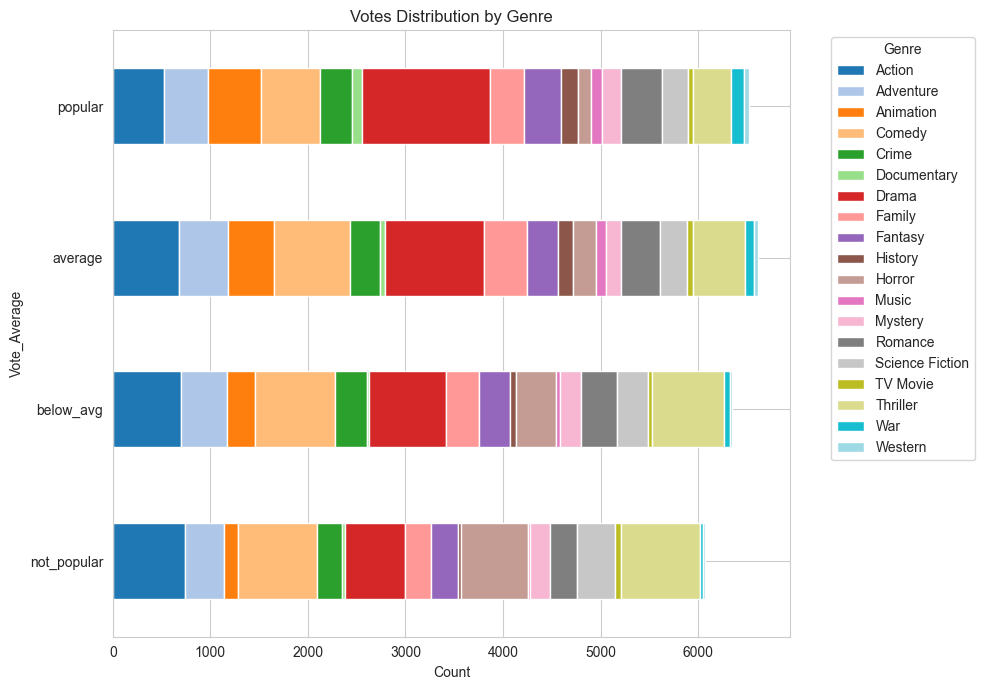

In [136]:
# Group by both 'Vote_Average' and 'Genre'
genre_counts = df.groupby(['Vote_Average', 'Genre'], observed=True).size().reset_index(name='count')

# Pivot for stacked bar plotting
pivot_df = genre_counts.pivot(index='Vote_Average', columns='Genre', values='count').fillna(0)

# Plot
pivot_df.plot(kind='barh', stacked=True, figsize=(10,7), colormap='tab20')
plt.title('Votes Distribution by Genre')
plt.xlabel('Count')
plt.ylabel('Vote_Average')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# What movie got the highest popularity? what's its genre?

In [114]:
# Checking for movies with highest popularity
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# What movie got the lowest popularity? what's its genre?

In [115]:
# Checking for movies with lowest popularity
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


# Which year has the most filmmed movies?

In [123]:
# Checking for year with highest filmmed movies
df['Release_Date'].value_counts()

Release_Date
2021    1636
2018    1384
2017    1365
2019    1271
2016    1209
        ... 
1920       4
1902       3
1925       2
1929       2
1930       2
Name: count, Length: 100, dtype: int64

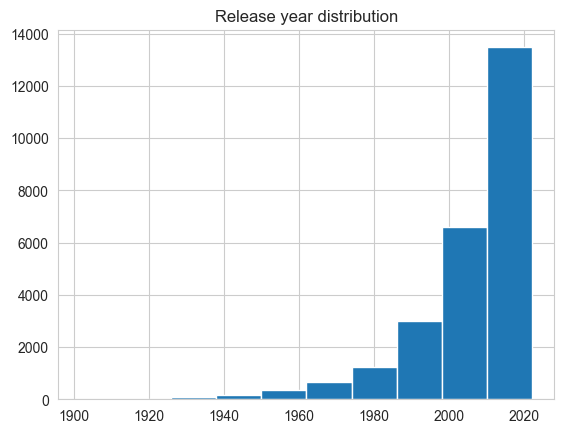

In [126]:
# Histogram plot of Release_Date
df['Release_Date'].hist()

# Plot
plt.title('Release year distribution')
plt.show()

Concolusion

Q1:What is the most frequent genre in the dataset? 
Drama genre is the most frequent genre in the dataset and has appeared more than 14% of the times among 19 other genres. 

Q2: What genres has highest votes ? 
We have 25.5% of the dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by having more than 20.06% of movies popularities. 

Q3: What movie got the highest popularity? what's its genre ? 
'Spider-Man: No Way Home' has the highest popularity rate in the dataset and it has genres of 'Action', 'Adventure' and 'Sience Fiction'. 

Q4: What movie got the lowest popularity? what's its genre ? 
'The united states', 'thread' has the lowest rate in our dataset and it has genres of 'music', 'drama', 'war', 'sci-fi' and 'history'. 

Q5: Which year has the most filmmed movies? 
year 2021 has the highest filmming rate in the dataset.